In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
n_class = 10

X_train = np.reshape(X_train, (-1, 28 * 28)) / 255.
X_test = np.reshape(X_test, (-1, 28 * 28)) /255.

Y_train = np.eye(n_class)[Y_train]
Y_test = np.eye(n_class)[Y_test]

print("X_train.shape :", X_train.shape)
print("Y_train.shape :", Y_train.shape)
print()
print("X_test.shape :", X_test.shape)
print("Y_test.shape :", Y_test.shape)

X_train.shape : (60000, 784)
Y_train.shape : (60000, 10)

X_test.shape : (10000, 784)
Y_test.shape : (10000, 10)


In [0]:
class Model(object):
  def __init__(self, X_shape, Y_shape, learning_rate):
    self.build_graph(X_shape, Y_shape, learning_rate)
    
  def make_placeholder(self, X_shape, Y_shape):
    self.X = tf.placeholder(tf.float32, [None, X_shape[1]], name="X")
    self.Y = tf.placeholder(tf.int32, [None, Y_shape[1]], name="Y")
    
  def initialize_parameter(self, shape, name):
    var = tf.get_variable(name=name, shape=shape, initializer=tf.contrib.layers.xavier_initializer(seed=20181007))
    return var
  
  def fully_connected_layer(self, X, W, b):
    Z = tf.matmul(X, W) + b
    A = tf.nn.softmax(Z)
    return A
  
  def compute_cost(self, A, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=A, labels=Y))
    return cost
  
  def compute_acc(self, A, Y):
    self.Y_hat = tf.argmax(A, axis=1)
    self.Y_label = tf.argmax(Y, axis=1)
    equals = tf.equal(self.Y_label, self.Y_hat)
    acc = tf.reduce_mean(tf.cast(equals, tf.float32))
    return acc
  
  def build_graph(self, X_shape, Y_shape, learning_rate):
    self.make_placeholder(X_shape, Y_shape)
    with tf.variable_scope("FC1", reuse=tf.AUTO_REUSE):
      W = self.initialize_parameter([X_shape[1], Y_shape[1]], "W")
      b = self.initialize_parameter([Y_shape[1]], "b")
      A = self.fully_connected_layer(self.X, W, b)
    
    with tf.variable_scope("OP", reuse=tf.AUTO_REUSE):

      self.cost = self.compute_cost(A, self.Y)
      self.acc = self.compute_acc(A, self.Y)
      self.train = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

In [0]:
epochs = 201
learning_rate = 0.01
myModel = Model(X_train.shape, Y_train.shape, learning_rate)

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())
for epoch in range(epochs):
  _, cost, acc = sess.run([myModel.train, myModel.cost, myModel.acc], feed_dict={myModel.X: X_train, myModel.Y: Y_train})
  if epoch % 10 == 0 :
    print("Epoch:", epoch,"\t", "Cost:",cost,"\t", "Acc:",acc * 100)
print("Train Acc:",acc*100)
acc = sess.run(myModel.acc, feed_dict={myModel.X: X_test, myModel.Y: Y_test})
print("Test Acc:", acc * 100 )

Epoch: 0 	 Cost: 2.304765 	 Acc: 11.201666295528412
Epoch: 10 	 Cost: 1.7742405 	 Acc: 79.29166555404663
Epoch: 20 	 Cost: 1.6563272 	 Acc: 85.32000184059143
Epoch: 30 	 Cost: 1.6196532 	 Acc: 87.58999705314636
Epoch: 40 	 Cost: 1.6014279 	 Acc: 88.79666924476624
Epoch: 50 	 Cost: 1.5904706 	 Acc: 89.56000208854675
Epoch: 60 	 Cost: 1.5829214 	 Acc: 90.17166495323181
Epoch: 70 	 Cost: 1.5772172 	 Acc: 90.59000015258789
Epoch: 80 	 Cost: 1.5726547 	 Acc: 90.95333218574524
Epoch: 90 	 Cost: 1.5688894 	 Acc: 91.25166535377502
Epoch: 100 	 Cost: 1.5657232 	 Acc: 91.4900004863739
Epoch: 110 	 Cost: 1.5630095 	 Acc: 91.68499708175659
Epoch: 120 	 Cost: 1.5606432 	 Acc: 91.86833500862122
Epoch: 130 	 Cost: 1.5585485 	 Acc: 92.0199990272522
Epoch: 140 	 Cost: 1.5566702 	 Acc: 92.13500022888184
Epoch: 150 	 Cost: 1.5549698 	 Acc: 92.24333167076111
Epoch: 160 	 Cost: 1.553418 	 Acc: 92.3550009727478
Epoch: 170 	 Cost: 1.551993 	 Acc: 92.47000217437744
Epoch: 180 	 Cost: 1.5506768 	 Acc: 92.54666

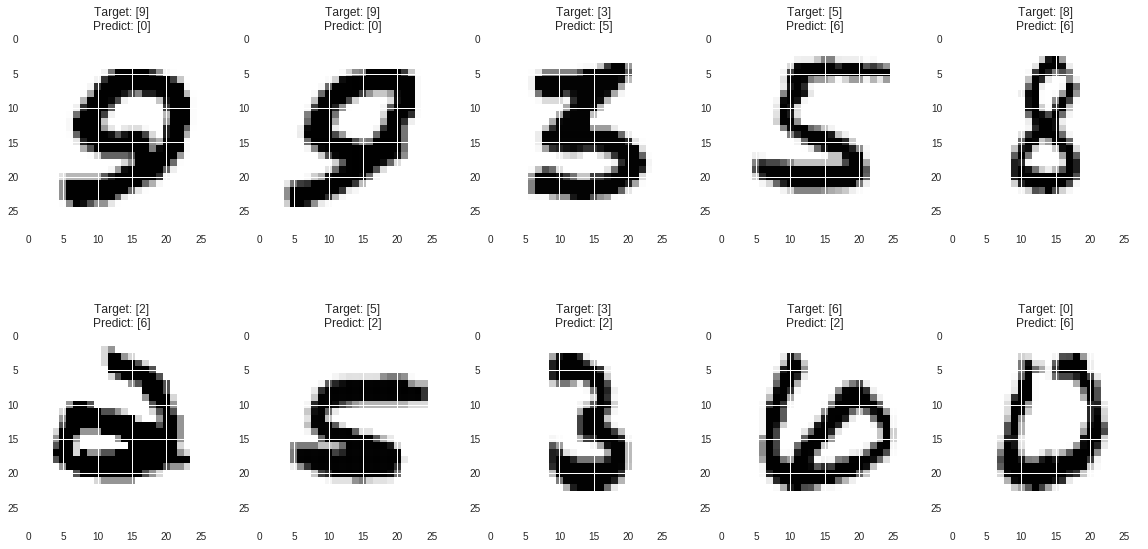

In [11]:
%matplotlib inline
Y_hat, Y_label = sess.run([myModel.Y_hat, myModel.Y_label], feed_dict={myModel.X: X_test, myModel.Y:Y_test})
fig=plt.figure(figsize=(20, 10))

not_equal= Y_hat!=Y_label
imgs = X_test[not_equal] 
r = np.random.randint(len(imgs)-10, size=1)
for i in range(10):
  img = imgs[i+r].reshape(28, 28)
  fig.add_subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title("Target: "+str(Y_label[not_equal][i+r])+"\nPredict: "+ str(Y_hat[not_equal][i+r]) )
